In [7]:
# Data analysis and Manipulation 
import plotly.graph_objs as go 
import plotly.io as pio 
import plotly.express as px 
import pandas as pd 

# Data Visualization 
import matplotlib.pyplot as plt 

# Importing Plotly 
import plotly.offline as py 
py.init_notebook_mode(connected=True) 

# Initializing Plotly 
pio.renderers.default = 'colab'


In [8]:
# Importing Dataset1 
dataset1 = pd.read_csv("covid.csv") 
dataset1.head() # returns first 5 rows 


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [9]:
# Importing Dataset2 
dataset2 = pd.read_csv("covid_grouped.csv") 
dataset2.head() # return first 5 rows of dataset2 


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [10]:
# Columns labels of a Dataset1 
dataset1.columns 


Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [11]:
# Drop NewCases, NewDeaths, NewRecovered rows from dataset1 

dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], 
			axis=1, inplace=True) 

# Select random set of values from dataset1 
dataset1.sample(5) 


,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
105,Zimbabwe,Africa,14883803.0,4339,84.0,1264.0,2991.0,NaN,292.0,6.0,140421.0,9434.0,Africa,ZWE
107,Hong Kong,Asia,7503041.0,3850,46.0,2458.0,1346.0,39.0,513.0,6.0,692430.0,92287.0,WesternPacific,HKG
127,Guinea-Bissau,Africa,1972277.0,2032,27.0,944.0,1061.0,5.0,1030.0,14.0,1500.0,761.0,Africa,GNB
56,Morocco,Africa,36953359.0,29644,449.0,20553.0,8642.0,31.0,802.0,12.0,1383816.0,37448.0,EasternMediterranean,MAR
5,Mexico,North America,129066160.0,462690,50517.0,308848.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,MEX


In [22]:
# Import create_table Figure Factory 

from plotly.figure_factory import create_table 

colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']] 
table = create_table(dataset1.head(15), colorscale=colorscale) 
py.iplot(table) 


In [13]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases', 
	color = 'TotalDeaths', height = 500, 
	hover_data = ['Country/Region', 'Continent'])


In [14]:
px.scatter(dataset1, x='Continent',y='TotalCases', 
		hover_data=['Country/Region', 'Continent'], 
		color='TotalCases', size='TotalCases', size_max=80)


In [15]:
px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths', 
		hover_data=['Country/Region', 'Continent'], 
		color='TotalDeaths', size= 'TotalDeaths', size_max=80, 
		log_x=True, log_y=True)


In [16]:
px.scatter(dataset1.head(30), x='TotalTests', y= 'TotalCases', 
		hover_data=['Country/Region', 'Continent'], 
		color='TotalTests', size= 'TotalTests', size_max=80, 
		log_x=True, log_y=True)


In [17]:
df_US= dataset2.loc[dataset2["Country/Region"]=="US"]
px.bar(df_US, x="Date", y="Confirmed", color="Confirmed", height=400)


In [18]:
px.line(df_US,x="Date", y="Deaths", height=400)


In [19]:
px.choropleth(dataset2, 
			locations="iso_alpha", 
			color="Confirmed", 
			hover_name="Country/Region", 
			color_continuous_scale="Blues", 
			animation_frame="Date")


In [20]:
dataset3= pd.read_csv("coviddeath.csv") 
dataset3.head()


,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN


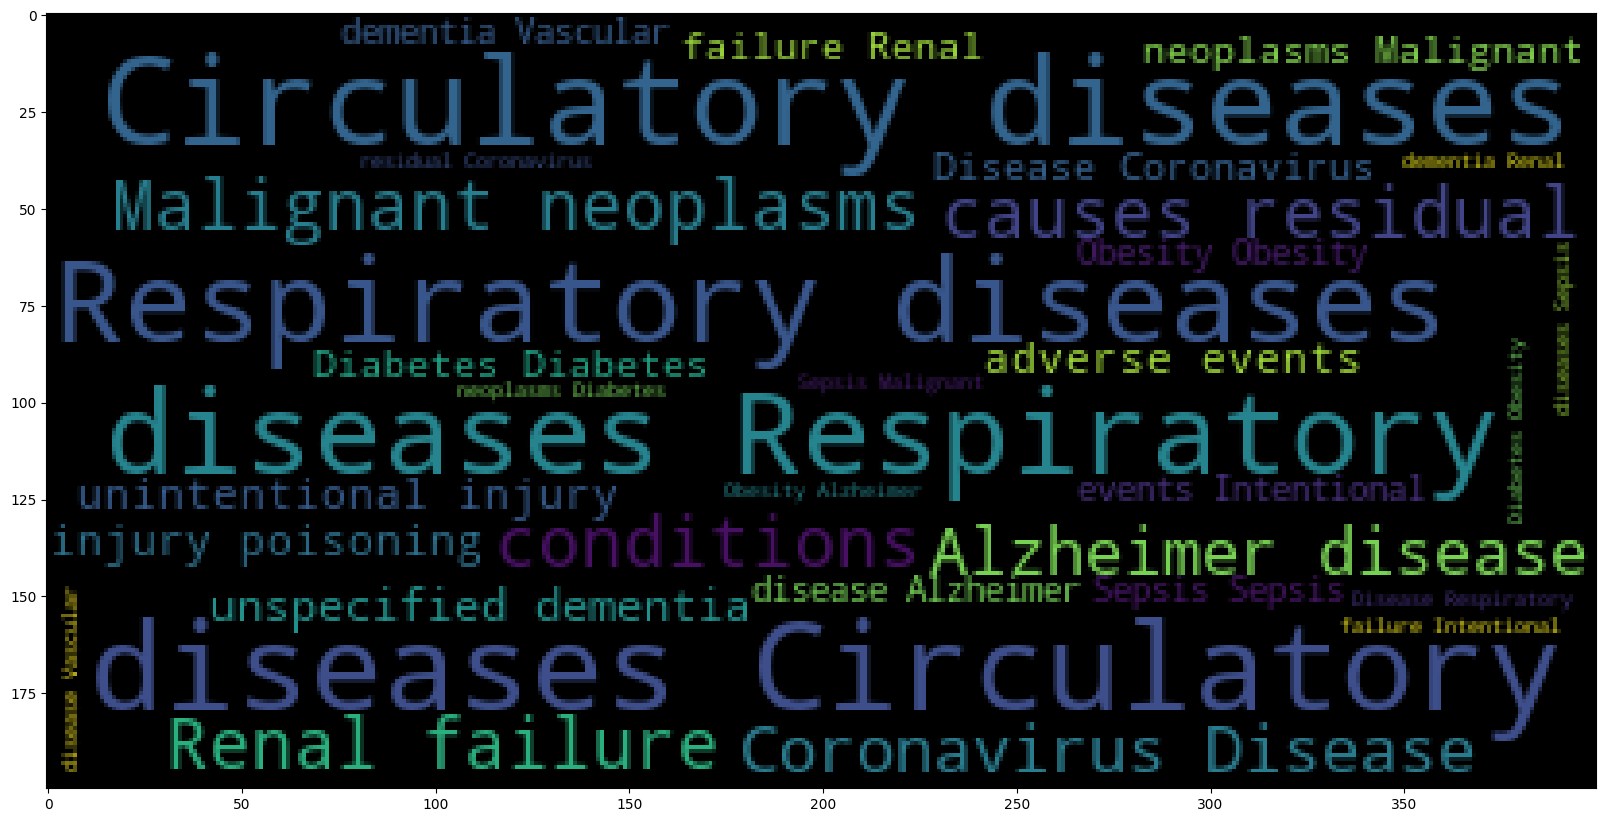

In [21]:
column2_tolist= dataset3["Condition Group"].tolist() 

# Convert the list to one single string 
column_to_string= " ".join(column2_tolist) 

# Convert the string into WordCloud 
plt.figure(figsize=(20,20)) 
plt.imshow(WordCloud().generate(column_to_string)) 
